### 01_ETL

In [2]:
import os
import uuid
import fastparquet
import pandas as pd
import geopandas as gpd


![Texto alternativo](gallery/database_schema.jpg)


#### SOURCES

In [2]:
# Create
sources = pd.DataFrame([
    {"source_id": 1, "source": "Yelp"},
    {"source_id": 2, "source": "GoogleMaps"},
    {"source_id": 3, "source": "Booking"},
    {"source_id": 4, "source": "Trivago"}
])
sources

# Export
sources.to_csv("data/sources.csv", index=False)
sources

,source_id,source
0,1,Yelp
1,2,GoogleMaps
2,3,Booking
3,4,Trivago


#### SIG DATA

Cities

In [9]:
# Import
usa_cities = pd.read_csv("data/sig/uscities.csv")
sig_ciudades = gpd.read_file("data/sig/Ciudades/Estados_Unidos_Poblaciones.shp")

In [10]:
# Transform
sig_ciudades["TIPO"] = sig_ciudades["TIPO"].replace("Ciudad", "city")
sig_ciudades["TIPO"] = sig_ciudades["TIPO"].replace("Pueblo", "town")
sig_ciudades.rename(columns={"NOMBRE": "city", "ESTADO": "state_id", "TIPO": "size"}, inplace=True)
usa_cities.rename(columns={"county_name": "county", "lat": "latitude", "lng": "longitude"}, inplace=True)
usa_cities.drop(columns=["county_fips", "source", "ranking", "timezone", "incorporated", "military", "state_name", "city_ascii"], inplace=True)

columns_order = ["city_id", "city", "county", "state_id", "population", "density", "latitude", "longitude", "zips"]
usa_cities = usa_cities.reindex(columns=columns_order)
usa_cities = pd.merge(usa_cities, sig_ciudades[["city", "state_id", "geometry"]], on=["city", "state_id"])

for i, row in usa_cities.iterrows():
    usa_cities.at[i, 'city_id'] = int(i+1)

# Export
usa_cities.to_csv("data/usa_cities.csv", index=False)
usa_cities

,city_id,city,county,state_id,population,density,latitude,longitude,zips,geometry
0,1.0,New York,Queens,NY,18908608,11226.2,40.6943,-73.9249,11229 11228 11226 11225 11224 11222 11221 1122...,POINT (-73.94343 40.66990)
1,2.0,Los Angeles,Los Angeles,CA,11922389,3202.3,34.1141,-118.4068,91367 90291 90293 90292 91316 91311 90035 9003...,POINT (-118.41211 34.11211)
2,3.0,Chicago,Cook,IL,8497759,4648.7,41.8375,-87.6866,60018 60649 60641 60640 60643 60642 60645 6064...,POINT (-87.68502 41.83708)
3,4.0,Miami,Miami-Dade,FL,6080145,4728.2,25.7840,-80.2101,33128 33129 33125 33126 33127 33149 33144 3314...,POINT (-80.21062 25.77604)
4,5.0,Houston,Harris,TX,5970127,1382.2,29.7860,-95.3885,77069 77068 77061 77060 77063 77062 77065 7706...,POINT (-95.38694 29.76893)
...,...,...,...,...,...,...,...,...,...,...
21823,21824.0,Monowi,Boyd,NE,0,1.8,42.8307,-98.3296,68746,POINT (-98.32915 42.83006)
21824,21825.0,Centralia,Columbia,PA,0,13.1,40.8047,-76.3439,17888 17921,POINT (-76.34391 40.80433)
21825,21826.0,McCarthy,Copper River,AK,0,0.0,61.4539,-142.8648,99566,POINT (-142.90010 61.42277)
21826,21827.0,Supai,Coconino,AZ,0,24.3,36.2298,-112.6926,86435,POINT (-112.69396 36.22414)


States

In [11]:
# Import
usa_states = gpd.read_file("data/sig/Estados/Estados_Unidos_Estados.shp")

# Transform
usa_states.rename(columns={"STATE_ABBR": "state_id", "STATE_NAME": "state"}, inplace=True)
usa_states.drop(columns=["STATE_FIPS"], inplace=True)

# Export
usa_states.to_csv("data/usa_states.csv", index=False)
usa_states

,state,state_id,geometry
0,Washington,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
5,Wyoming,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
6,Wisconsin,WI,"MULTIPOLYGON (((-87.74855 44.96162, -87.83999 ..."
7,Idaho,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."
8,Vermont,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747..."
9,Minnesota,MN,"POLYGON ((-91.73037 43.49957, -92.07753 43.499..."


Cities

#### YELP

##### hotels table

In [12]:
# Import
raw_yelp_business = pd.read_pickle("data/yelp/business.pkl")

In [13]:
# Transform
yelp_business = raw_yelp_business.copy()
yelp_business = yelp_business.iloc[:, :13] # drop empty columns
yelp_business.drop(columns=["is_open"]) # drop irrelevant data
yelp_business.rename(columns={'business_id': 'hotel_id', 'name': 'hotel', 'review_count': 'num_of_reviews', "state": "state_id"}, inplace=True) # rename columns
yelp_business['categories'] = yelp_business['categories'].astype(str)
yelp_business['categories'] = yelp_business['categories'].str.split(",")

# Filtrate
hotel_business = pd.DataFrame()
hotel_categorias = ['Hotels & Travel', 'Hotels', 'Bed & Breakfast', 'Resorts', 'Hostels', 'Vacation Rentals', 'Residences', 'Day Spas', 'Rest Stops']
for categoria in hotel_categorias:
    filtrados = yelp_business[yelp_business['categories'].apply(lambda x: categoria in x)]
    hotel_business = pd.concat([hotel_business, filtrados], ignore_index=True)
yelp_hotel_business = hotel_business.drop_duplicates(subset=['hotel_id'])

# Handle datatypes
yelp_hotel_business['attributes'] = yelp_hotel_business['attributes'].astype(str)
yelp_hotel_business['stars'] = yelp_hotel_business['stars'].astype(float)
yelp_hotel_business['hotel'] = yelp_hotel_business['hotel'].astype(str)
yelp_hotel_business['address'] = yelp_hotel_business['address'].astype(str)
yelp_hotel_business['city'] = yelp_hotel_business['city'].astype(str)

# Create city_id column
yelp_hotel_business = pd.merge(yelp_hotel_business, usa_cities[["city", "state_id", "city_id"]], on=["city", "state_id"])
yelp_hotel_business.drop(columns=["city", "state_id"], inplace=True)
yelp_hotel_business["source_id"] = 1 # create column to keep track of data source

# Reorder
columns_order = ["hotel_id", "hotel", "stars", "address", "city_id", "latitude", "longitude", "categories", "attributes", "source_id"]
yelp_hotel_business = yelp_hotel_business.reindex(columns=columns_order) # reorder dataset
yelp_hotel_business.drop_duplicates(subset=["hotel_id"], inplace=True)

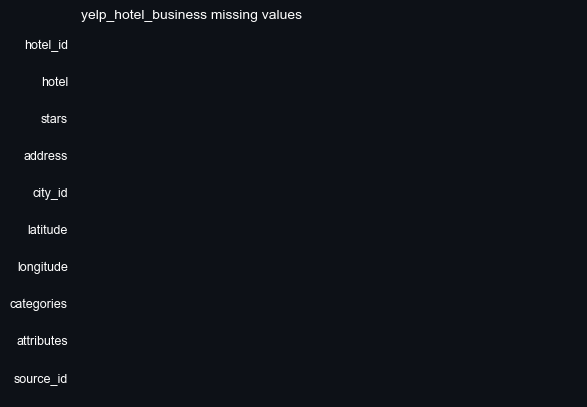

In [14]:
#Explore and export
personalised_graphics.missing_values_heatmap(yelp_hotel_business, "yelp_hotel_business")
yelp_hotel_business.to_csv("data/yelp_hotel_business.csv", index=False)

##### reviews table

In [46]:
# import data
raw_yelp_reviews = pd.read_parquet("data/yelp/review.parquet")

In [47]:
# Transform
yelp_reviews = raw_yelp_reviews
columnas_yelp = ['review_id', 'user_id', 'business_id', 'date', 'text', 'stars', 'useful']
yelp_reviews = yelp_reviews[columnas_yelp].copy() # Filtrate relevant data
yelp_reviews.rename(columns={'business_id': 'hotel_id', 'text': 'review', 'stars': 'score'}, inplace=True)

# Filtrate and export hotel businesses reviews
yelp_hotel_reviews = yelp_reviews[yelp_reviews['hotel_id'].isin(yelp_hotel_business["hotel_id"])]

# Transform
yelp_hotel_reviews['review'] = yelp_hotel_reviews['review'].apply(lambda x: str(x).encode('utf-8', 'ignore').decode('utf-8')) # Cambiando tipos de datos
yelp_hotel_reviews['date'] = pd.to_datetime(yelp_hotel_reviews['date'], format='%Y-%m-%d %H:%M:%S').dt.date 
yelp_hotel_reviews['review_id'] = yelp_hotel_reviews['review_id'].drop_duplicates() # Handle duplicated values

# Reorder
columns_order = ["review_id", "user_id", "hotel_id", "score", "useful", "review", "date"] 
yelp_hotel_reviews = yelp_hotel_reviews.reindex(columns=columns_order) # reorder dataset

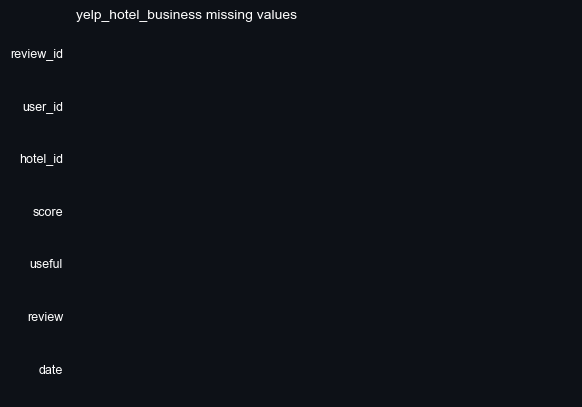

In [48]:
#Explore and export
personalised_graphics.missing_values_heatmap(yelp_hotel_reviews, "yelp_hotel_business")
yelp_hotel_reviews.to_csv("data/yelp_hotel_reviews.csv", index=False)

##### users table

In [50]:
# import data
raw_yelp_users = pd.read_parquet("data/yelp/user.parquet")

In [51]:
# Transform
yelp_users = raw_yelp_users.copy()
yelp_users = yelp_users[yelp_users['user_id'].isin(yelp_hotel_reviews["user_id"])] # Filtrando a los hoteles
columns_to_keep = ['user_id', 'name', 'review_count', 'useful']
yelp_users = yelp_users[columns_to_keep] # filtrate relevant data

# handle duplicated values
duplicados = yelp_users[yelp_users.duplicated()]
yelp_users.drop_duplicates(inplace=True)

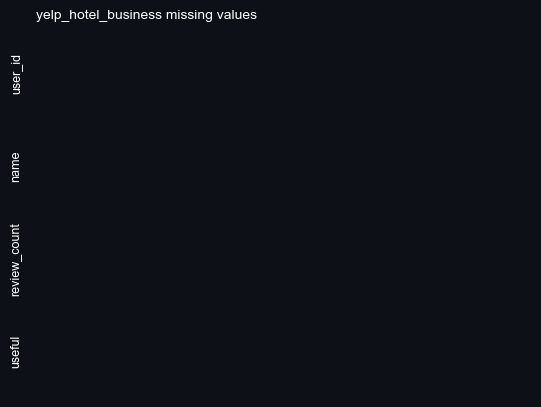

In [52]:
# export data
yelp_users.to_csv("data/yelp_users.csv", index=False)
personalised_graphics.missing_values_heatmap(yelp_users, "yelp_hotel_business")

#### GOOGLE MAPS

##### business table

In [15]:
# Import
raw_google_business = pd.read_parquet('data/google/metadata_sitio.parquet')

In [16]:
#Transform
google_business = raw_google_business.copy()
google_business.drop(columns=["description", "relative_results", "price", "hours", "state"], inplace=True) # Drop irrelevant data
google_business.rename(columns={'gmap_id': 'hotel_id', 'address': 'location', 'category': 'categories', 'bussines_id': 'hotel_id'}, inplace=True) #  Rename columns

# Filtrar business_ids basándote en las palabras clave en la columna 'categorias'
palabras_clave = ['hotel', 'motel', 'lodge', 'resort', 'hostel', 'bed and breakfast', 'guesthouse', 'retreat', 'boutique',
                 'apartment', 'pension', 'villa', 'cabin', 'inn', 'guesthouse', 'youth hostel', 'rural accommodation', 'mansion', 'spa']
df_exploded = google_business.explode(column="categories")
df_exploded = df_exploded.dropna(subset=['categories'])
df_exploded['categories'] = df_exploded['categories'].str.lower()
filtro = df_exploded['categories'].str.contains('|'.join(palabras_clave), case=False)
filtered_business = df_exploded[filtro]
filtered_business = filtered_business.drop_duplicates(subset=['hotel_id'])

# Filtrate hotel businesses
google_hotel_business = google_business[google_business['hotel_id'].isin(filtered_business["hotel_id"])]

# Combine MISC columns into atributes
google_hotel_business['attributes'] = google_hotel_business[['MISC.Service options',
       'MISC.Health & safety', 'MISC.Accessibility', 'MISC.Planning', 'MISC',
       'MISC.Payments', 'MISC.Highlights', 'MISC.Offerings', 'MISC.Amenities',
       'MISC.Atmosphere', 'MISC.Crowd', 'MISC.From the business',
       'MISC.Popular for', 'MISC.Dining options', 'MISC.Getting here',
       'MISC.Recycling', 'MISC.Activities', 'MISC.Lodging options']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
# Drop misc columns
columns_to_drop = ['MISC.Service options',
       'MISC.Health & safety', 'MISC.Accessibility', 'MISC.Planning', 'MISC',
       'MISC.Payments', 'MISC.Highlights', 'MISC.Offerings', 'MISC.Amenities',
       'MISC.Atmosphere', 'MISC.Crowd', 'MISC.From the business',
       'MISC.Popular for', 'MISC.Dining options', 'MISC.Getting here',
       'MISC.Recycling', 'MISC.Activities', 'MISC.Lodging options']
google_hotel_business.drop(columns=columns_to_drop, inplace=True)

# Desanidate location column
def extract_location_info(row):
    if row["location"] is not None:
        loc_parts = row["location"].split(",")
        if len(loc_parts) >= 4:
            parts = loc_parts[3].strip().split(" ")
            if len(parts) >= 2:
                return pd.Series({
                    "address": loc_parts[1].strip(),
                    "city": loc_parts[2].strip(),
                    "state": parts[0].strip(),
                    "post_code": parts[1].strip()})
    return pd.Series({"address": None, "city": None, "state": None, "post_code": None})
google_hotel_business[["address", "city", "state_id", "post_code"]] = google_hotel_business.apply(extract_location_info, axis=1)
google_hotel_business.drop(columns=["location", "post_code"], inplace=True)

# Create city_id column
google_hotel_business = pd.merge(google_hotel_business, usa_cities[["city", "state_id", "city_id"]], on=["city", "state_id"])
google_hotel_business.drop(columns=["city", "state_id"], inplace=True)

# Reorder columns
columns_order = ['hotel_id', "name", "categories", "address", "city_id", "latitude", "longitude", "attributes", "avg_rating", "num_of_reviews", "url"]
google_hotel_business = google_hotel_business.reindex(columns=columns_order)

google_hotel_business["source_id"] = 2 # create column to keep track of data source

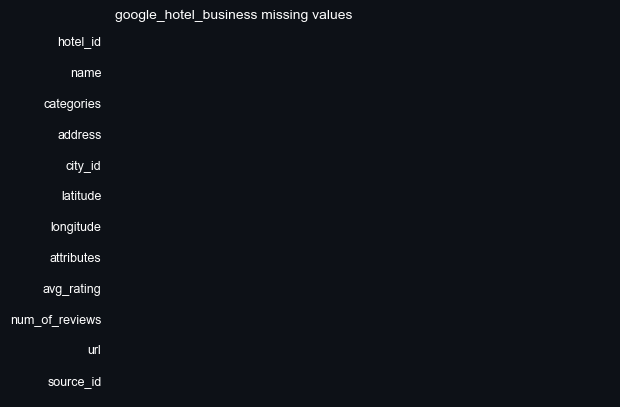

In [17]:
#Explore and export
personalised_graphics.missing_values_heatmap(google_hotel_business, "google_hotel_business")
google_hotel_business.to_csv("data/google_hotel_business.csv", index=False)

##### reviews table

In [83]:
# Import
raw_google_reviews = pd.read_parquet('data/google/g_review.parquet')

In [80]:
# Transform
google_reviews = raw_google_reviews.copy()
columnas = ['user_id', 'time', 'text', 'resp.text', 'resp.time', 'gmap_id']
google_reviews = google_reviews[columnas]
google_reviews = google_reviews.rename(columns={'gmap_id': 'hotel_id'})

# Filtrate
google_hotel_reviews = google_reviews[google_reviews['hotel_id'].isin(google_hotel_business["hotel_id"])]

# Reorder columns
columns_order = ['hotel_id', "user_id", "time", "review", "resp", "resp_time"]
google_hotel_business = google_hotel_business.reindex(columns=columns_order)

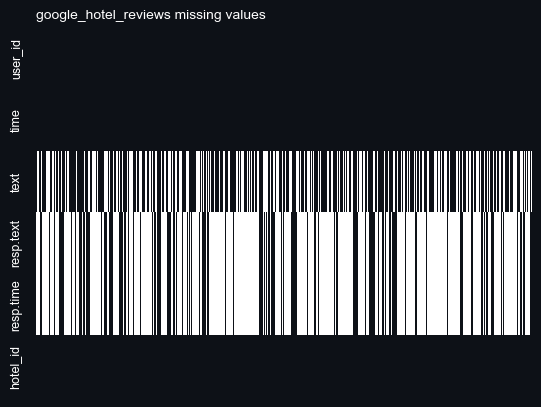

In [81]:
#Explore and export
google_hotel_reviews.to_csv("data/google_hotel_reviews.csv", index=False)
personalised_graphics.missing_values_heatmap(google_hotel_reviews, "google_hotel_reviews")

#### BOOKING

In [8]:
import os
import pandas as pd

hotels_dr = "files/data/booking/hotels"

attractions = []
for archivo in os.listdir(hotels_dr):
    if archivo.endswith(".csv"):
        ruta_completa = os.path.join(hotels_dr, archivo)
        df = pd.read_csv(ruta_completa)
        attractions.append(df)
booking_hotels = pd.concat(attractions, ignore_index=True)

booking_hotels.dropna(subset=["name"], inplace=True)
#usa_hotels = usa_hotels.drop_duplicates(subset=["city", "name", "avg_score"])
booking_hotels = booking_hotels.sort_values(by="avg_score", ascending=False)
booking_hotels["hotel_id"] = range(1, len(booking_hotels) + 1)

booking_hotels.to_csv("files/data/booking/booking_hotels.csv")
booking_hotels

,state,city,name,avg_score,price,reviews_url,stars,hotel_id
20614,Massachusetts,New Bedford,DOMIR Yorktown,100.0,780.980,https://www.booking.com/hotel/us/domir-yorktow...,NaN,1
2747,Arkansas,Fayetteville,Luxury Cozy House - 20 min to FT Liberty!,100.0,402.455,https://www.booking.com/hotel/us/luxury-house-...,NaN,2
5090,Connecticut,New Haven,"Queen Beds, Fast WiFi, Free Parking, Central A...",100.0,659.250,https://www.booking.com/hotel/us/queen-beds-fa...,NaN,3
32981,Oklahoma,Midwest City,"Walnut, 3BR Townhom Near Downtown, Beach and W...",100.0,1149.716,https://www.booking.com/hotel/us/walnut-3br-to...,NaN,4
28768,New Mexico,Rio Rancho,The Reynosa Retreat,100.0,289.895,https://www.booking.com/hotel/us/the-reynosa-r...,3.0,5
...,...,...,...,...,...,...,...,...
18990,Maryland,Frederick,"Serene, Country Retreat about 12 Mi to Main St!",10.0,354.310,https://www.booking.com/hotel/us/serene-countr...,NaN,43967
18981,Maryland,Frederick,Sunset View,10.0,335.070,https://www.booking.com/hotel/us/sunset-view-f...,NaN,43968
18967,Maryland,Frederick,Purple Sage,10.0,431.438,https://www.booking.com/hotel/us/purple-sage.e...,NaN,43969
18952,Maryland,Hagerstown,Boonsboro Studio with Wood-Burning Fire Pit!,10.0,221.081,https://www.booking.com/hotel/us/boonsboro-stu...,NaN,43970


In [3]:
import os
import pandas as pd

attributes_dr = "files/data/booking/attributes"

attributes = []
for archivo in os.listdir(attributes_dr):
    if archivo.endswith(".csv"):
        ruta_completa = os.path.join(attributes_dr, archivo)
        df = pd.read_csv(ruta_completa, index_col=0)
        attributes.append(df)
booking_hotels_attributes = pd.concat(attributes, ignore_index=True)
booking_hotels_attributes.to_csv('files/data/booking/booking_hotels_attributes.csv')

booking_hotels_attributes

,direction,description,attributes,latitude,longitude,scores,hotel_id
0,"25 Via del Giardino Serristori, 50125 Florenci...",El S2 - Tower se encuentra en el centro de Flo...,NaN,43.764761,11.261114,[{'Estudio con vistas al jardín': '1 cama dobl...,NaN
1,"5 Borgo San Jacopo, Santo Spirito, 50125 Flore...",L'Angolo di Ponte Vecchio se encuentra en el c...,"['Aire acondicionado', 'Calefacción', 'Mesa de...",43.767622,11.252144,[{'Apartamento de 1 dormitorio': '1 cama doble...,NaN
2,"via dei Rustici 1A, Uffizi, 50122 Florencia, I...",La Casa S a f e r ofrece alojamiento a 500 met...,NaN,43.768554,11.258770,NaN,NaN
3,"9 Via Vincenzo Borghini, Campo di Marte, 50133...",El The Place to Be! In Florence close to the c...,NaN,43.788233,11.268231,[],NaN
4,"7 Piazza della Signoria, Uffizi, 50122 Florenc...",El Signoria Deluxe Studio-2 people in Signoria...,"['¿Puedo llevar a mi mascota?', '¿Cuál es el h...",43.769914,11.256452,[{'Apartamento de 1 dormitorio': '1 cama doble'}],NaN
...,...,...,...,...,...,...,...
7749,"2850 Columbus Way, Reno, NV 89503, USA, Reno, ...",Vibrant Boho Home 3 Bed Pet Friendly se encuen...,NaN,39.545506,-119.862611,[],NaN
7750,"Reno, 89523-1853, Estados Unidos",Reno Getaway with Spacious Patio and Grill! es...,NaN,39.530286,-119.868808,NaN,NaN
7751,"Reno, 89509-1610, Estados Unidos",Authentic Midtown Cottage Less Than 1 Mi to Ri...,"['Cafetera', 'Habitaciones sin humo', 'Tostado...",39.518839,-119.814852,[],NaN
7752,"326 West 11th Street Unit C, Reno, NV 89503, E...",Funky Urban Studio near UNR se encuentra en Re...,"['Cafetera', 'Habitaciones sin humo', 'Tostado...",39.537890,-119.820427,[],NaN


In [7]:
booking_hotels_attributes["scores"][booking_hotels_attributes[""]].isna().sum()

2372

In [4]:
usa_hotels = pd.merge(booking_hotels, booking_hotels_attributes, on='hotel_id', how='left')
usa_hotels.to_csv('files/data/usa_hotels.csv')

TRIPADVISOR

In [17]:
import os
import pandas as pd

attractions_dr = "files/data/tripadvisor/attractions"

attractions = []
for archivo in os.listdir(attractions_dr):
    if archivo.endswith(".csv"):
        ruta_completa = os.path.join(attractions_dr, archivo)
        df = pd.read_csv(ruta_completa)
        attractions.append(df)

attractions = pd.concat(attractions, ignore_index=True)

def reclasificar_categoria(categoria):
    categorias_generales = {
        'Cultura': {'Museos de arte', 'Galerías de arte', 'Teatro y espectáculos', 'Óperas'},
        'Nocturno': {'Bares y boliches', 'Bares de jazz', 'Casinos', 'Carreras de caballos'},
        'Naturaleza': {'Parques', 'Jardines', 'Montañas', 'Playas', 'Bosques', 'Rutas para senderismo', 'Cascadas'},
        'Historia': {'Lugares históricos', 'Monumentos y estatuas', 'Edificios con valor arquitectónico', 'Misiones', 'Campos de batalla'},
        'Ciencia': {'Museos especializados', 'Museos de ciencia', 'Centros de información turística', 'Lugares educativos', 'Bibliotecas', 'Universidades y escuelas'},
        'Deportes': {'Campos de juego y estadios', 'Campos de golf', 'Complejos deportivos', 'Parques acuáticos', 'Rutas para ciclismo', 'Áreas para esquiar y practicar snowboard'},
        'Entretenimiento': {'Centros de juego y entretenimiento', 'Discotecas', 'Bares temáticos'},
        'Comida': {'Cervecerías', 'Destilerías', 'Viñedos con bodegas', 'Restaurantes temáticos'},
        'Espiritualidad': {'Iglesias y catedrales', 'Lugares religiosos', 'Capillas para bodas'},
        'Turismo': {'Lugares turísticos', 'Paseos turísticos', 'Tours a caballo', 'Tours de esquí y de nieve'}
    }

    for categoria_general, subcategorias in categorias_generales.items():
        if categoria in subcategorias:
            return categoria_general
    
    return None


# Asegúrate de que la columna 'categories' sea realmente una lista
attractions['categories'] = attractions['categories'].str.split(', ')

# Iterar sobre las filas y reclasificar las categorías
for i, row in attractions.iterrows():
    cat_list = []
    for cat in row['categories']:
        new_cat = reclasificar_categoria(cat)
        if new_cat is not None:
            cat_list.append(new_cat)
    if len(cat_list) > 0:
        attractions.at[i, 'new_categories'] = cat_list[0]

attractions.drop(columns=["categories", "Unnamed: 0"], inplace=True)
attractions.rename({"new_categories": "categories"}, inplace=True)


attractions.to_csv('files/data/tripadvisor/tripadvisor_attractions.csv')
attractions

,state_id,attraction,reviews_url,region,new_categories
0,IL,Instituto de Arte de Chicago,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,Cultura
1,IL,Parque Millennium,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,Naturaleza
2,IL,Museo de Ciencia e Industria,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,Ciencia
3,IL,Cloud Gate,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,Historia
4,IL,The Magnificent Mile,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,NaN
...,...,...,...,...,...
2057,TX,Museum of the Big Bend,https://www.tripadvisor.com.ar/Attraction_Revi...,West South Central,Ciencia
2058,TX,Chihuahuan Desert Nature Center & Botanical Ga...,https://www.tripadvisor.com.ar/Attraction_Revi...,West South Central,Naturaleza
2059,TX,Caliente Hot Glass,https://www.tripadvisor.com.ar/Attraction_Revi...,West South Central,Cultura
2060,TX,Museum of the Big Bend,https://www.tripadvisor.com.ar/Attraction_Revi...,West South Central,Ciencia


In [18]:
import os
import pandas as pd

attributes_dr = "files/data/tripadvisor/attributes"

attributes = []
for archivo in os.listdir(attributes_dr):
    if archivo.endswith(".csv"):
        ruta_completa = os.path.join(attributes_dr, archivo)
        df = pd.read_csv(ruta_completa, index_col=0)
        attributes.append(df)
attributes = pd.concat(attributes, ignore_index=True)
attributes.rename(columns={"url": "reviews_url"}, inplace=True)

attributes.dropna(inplace=True)
attributes["popularity"] = None
for i, row in attributes.iterrows():
    parts = row["n_reviews"].split(" ")
    attributes.at[i, 'popularity'] = parts[0].replace(".", "")
attributes.drop(columns=["n_reviews"], inplace=True)
attributes.rename(columns={'popularity': 'n_reviews'}, inplace=True)


attributes["n_reviews"] = attributes["n_reviews"].astype(int)
attributes["n_reviews"].fillna(attributes['n_reviews'].median(), inplace=True)

attributes.to_csv('files/data/tripadvisor/tripadvisor_attractions_attributes.csv')
attributes

,reviews_url,latitud,longitude,n_reviews
0,https://www.tripadvisor.com.ar/Attraction_Revi...,41.879566,-87.623756,24544
1,https://www.tripadvisor.com.ar/Attraction_Revi...,41.882557,-87.622551,25134
2,https://www.tripadvisor.com.ar/Attraction_Revi...,41.790562,-87.583023,11185
3,https://www.tripadvisor.com.ar/Attraction_Revi...,41.882618,-87.623322,18280
4,https://www.tripadvisor.com.ar/Attraction_Revi...,41.894810,-87.624222,15799
...,...,...,...,...
2057,https://www.tripadvisor.com.ar/Attraction_Revi...,30.363901,-103.651489,397
2058,https://www.tripadvisor.com.ar/Attraction_Revi...,30.556631,-103.866524,302
2059,https://www.tripadvisor.com.ar/Attraction_Revi...,29.436817,-98.473495,116
2060,https://www.tripadvisor.com.ar/Attraction_Revi...,30.363901,-103.651489,397


In [19]:
import pandas as pd
usa_attributes = pd.merge(attractions, attributes, on="reviews_url", how="left")
usa_attributes.drop_duplicates(subset="attraction" ,inplace=True)
usa_attributes.to_csv('files/data/usa_attractions.csv')
usa_attributes

,state_id,attraction,reviews_url,region,new_categories,latitud,longitude,n_reviews
0,IL,Instituto de Arte de Chicago,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,Cultura,41.879566,-87.623756,24544.0
2,IL,Parque Millennium,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,Naturaleza,41.882557,-87.622551,25134.0
4,IL,Museo de Ciencia e Industria,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,Ciencia,41.790562,-87.583023,11185.0
6,IL,Cloud Gate,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,Historia,41.882618,-87.623322,18280.0
8,IL,The Magnificent Mile,https://www.tripadvisor.com.ar/Attraction_Revi...,East North Central,NaN,41.894810,-87.624222,15799.0
...,...,...,...,...,...,...,...,...
2336,TX,Mayfield Park,https://www.tripadvisor.com.ar/Attraction_Revi...,West South Central,Naturaleza,30.312510,-97.770447,247.0
2337,TX,Museum of the Big Bend,https://www.tripadvisor.com.ar/Attraction_Revi...,West South Central,Ciencia,30.363901,-103.651489,397.0
2339,TX,Chihuahuan Desert Nature Center & Botanical Ga...,https://www.tripadvisor.com.ar/Attraction_Revi...,West South Central,Naturaleza,30.556631,-103.866524,302.0
2340,TX,Caliente Hot Glass,https://www.tripadvisor.com.ar/Attraction_Revi...,West South Central,Cultura,29.436817,-98.473495,116.0


California analysis

In [13]:
import pandas as pd

california_hotels = pd.read_csv('files/data/booking/hotels/california_hotels.csv')

california_hotels_attributes = pd.read_csv('files/data/booking/attributes/california_hotels_attributes.csv', index_col=0)
california_hotels_attributes.drop(columns=["hotel_id", "description", 'direction'], inplace=True)
california_hotels_attributes.rename(columns={'url': 'reviews_url'}, inplace=True)

california_hotels = pd.merge(california_hotels, california_hotels_attributes, on='reviews_url')
california_hotels.to_csv('files/data/booking/california_hotels.csv')
california_hotels

,state,city,name,avg_score,price,stars,reviews_url,attributes,latitude,longitude,scores
0,California,Los Angeles,Central Los Angeles Hollywood Homes,88,418.541,4,https://www.booking.com/hotel/us/spacious-apar...,"['Terraza', 'Habitaciones familiares', 'Aire a...",34.038893,-118.300133,NaN
1,California,Los Angeles,W Hollywood,73,849.752,4,https://www.booking.com/hotel/us/w-hollywood.e...,"['Habitaciones sin humo', '4 restaurantes', 'W...",34.100794,-118.325906,"[{'Personal': '8.1'}, {'Instalaciones y servic..."
2,California,Los Angeles,Park Plaza Lodge,86,466.927,3,https://www.booking.com/hotel/us/park-plaza-lo...,"['Restaurante', 'Parking gratis', 'Tetera/cafe...",34.070129,-118.351360,"[{'Personal': '9.4'}, {'Instalaciones y servic..."
3,California,Los Angeles,Moxy Downtown Los Angeles,79,904.364,4,https://www.booking.com/hotel/us/moxy-downtown...,"['WiFi gratis', 'Desayuno', 'Terraza', 'Parkin...",34.041151,-118.267341,"[{'Personal': '8.7'}, {'Instalaciones y servic..."
4,California,Los Angeles,Hollywood Homes minutes to everything SPACIOUS...,88,463.104,4,https://www.booking.com/hotel/us/hollywood-cos...,"['Habitaciones familiares', 'Aire acondicionad...",34.086662,-118.314868,"[{'Personal': '9.0'}, {'Instalaciones y servic..."
...,...,...,...,...,...,...,...,...,...,...,...
1272,California,Concord,Sarmiento Monoambiente,77,109.223,3,https://www.booking.com/hotel/ar/sarmiento-mon...,"['¿Cuáles son las condiciones del WiFi?', 'Hab...",-31.397425,-58.020966,"[{'Personal': '9.1'}, {'Instalaciones y servic..."
1273,California,Concord,Sol,81,196.601,3,https://www.booking.com/hotel/ar/sol-concordia...,"['Parking en un garaje', 'WiFi gratis', 'Parki...",-31.398753,-58.017309,"[{'Personal': '8.8'}, {'Instalaciones y servic..."
1274,California,Concord,Lau departamentos,74,68.810,3,https://www.booking.com/hotel/ar/lau-departame...,"['Baño privado', 'Parking gratis', 'Preguntas ...",-31.390294,-58.003603,"[{'Personal': '8.4'}, {'Instalaciones y servic..."
1275,California,Concord,Hermoso departamento sobre la peatonal estacio...,90,141.989,3,https://www.booking.com/hotel/ar/mitre-39.es.h...,"['Habitaciones familiares', 'Parking en un gar...",-31.396981,-58.018015,"[{'Personal': '9.5'}, {'Instalaciones y servic..."


Clients

In [ ]:
hotels = pd.read_csv("files/data/booking/booking_hotels.csv", index_col=0)
hotels.dropna(subset=["name"], inplace=True)
clients_hotels = hotels[(hotels["name"].str.contains("Hyatt")) & (hotels["state"] == "California")]
clients_hotels

,state,city,name,avg_score,price,reviews_url,stars,hotel_id
4182,California,Mission Viejo,Hyatt House Irvine/John Wayne Airport,88.0,363.318,https://www.booking.com/hotel/us/hyatt-house-i...,3.0,11042
3398,California,San Francisco,Hyatt Regency San Francisco,87.0,806.063,https://www.booking.com/hotel/us/hyatt-regency...,4.0,12695
4006,California,San Jose,Hyatt Place San Jose Pinares,87.0,262.134,https://www.booking.com/hotel/cr/hyatt-place-s...,3.0,13042
3564,California,San Diego,Manchester Grand Hyatt San Diego,86.0,620.385,https://www.booking.com/hotel/us/manchester-gr...,4.0,13769
3500,California,San Francisco,Hyatt Regency San Francisco Downtown SOMA,86.0,1020.140,https://www.booking.com/hotel/us/hyatt-regency...,4.0,13779
3442,California,San Francisco,Hyatt Place San Francisco/Downtown,85.0,631.307,https://www.booking.com/hotel/us/hyatt-place-s...,3.0,15065
3214,California,Los Angeles,"Thompson Hollywood, part of Hyatt",85.0,657.302,https://www.booking.com/hotel/us/thompson-holl...,4.0,15109
3574,California,San Diego,Hyatt Regency La Jolla at Aventine,84.0,443.444,https://www.booking.com/hotel/us/hyatt-regency...,4.0,16175
3390,California,San Francisco,"Hotel Kabuki, part of JdV by Hyatt",84.0,544.588,https://www.booking.com/hotel/us/miyako.es.htm...,4.0,16182
3400,California,San Francisco,Grand Hyatt San Francisco Union Square,84.0,563.589,https://www.booking.com/hotel/us/grand-hyatt-s...,4.0,16219


In [ ]:
clients_hotels.to_csv("files/data/usa_clients.csv")

Reviews

In [9]:
import pandas as pd
clients_reviews = pd.read_csv("files/data/booking/california_hotels_reviews.csv", index_col=0)
clients_reviews.drop(columns=["review_title", "date"], inplace=True)
clients_reviews.rename({'hotel_id': "reviews_url"}, inplace=True)
clients_reviews

,nationality,acommodation,stay,company,good_review,bad_review,hotel_id,rate,complete_date
0,Argentina,Suite Estudio con cocina y sofá cama - Cama ex...,4 noches,En grupo,"el hotel era cómodo para familias, el gimnasio...",es caro para un 4 estrellas,https://www.booking.com/hotel/us/hyatt-house-i...,"7,0",Comentó en: 5 de enero de 2023
1,España,Den Room with King Bed,11 noches,Persona que viaja sola,cerca de mis sitios de interés,"limpieza, desayuno,personal",https://www.booking.com/hotel/us/hyatt-house-i...,"5,0",Comentó en: 19 de diciembre de 2021
2,Corea del Sur,Suite Estudio con cocina y sofá cama - Cama ex...,27 noches,Persona que viaja sola,what a great honor to stay here.\r\nThank you ...,no worries.,https://www.booking.com/hotel/us/hyatt-house-i...,10,Comentó en: 20 de noviembre de 2023
3,Taiwán,Den Room with King Bed,4 noches,Persona que viaja sola,"Everything works and fairly new, I loved the w...",Small swimming pools,https://www.booking.com/hotel/us/hyatt-house-i...,10,Comentó en: 15 de noviembre de 2023
4,Estados Unidos,Suite Estudio con cocina y sofá cama - Cama ex...,4 noches,En familia,Weather was ideal\r\nLoved the swimming pool.,NaN,https://www.booking.com/hotel/us/hyatt-house-i...,10,Comentó en: 14 de noviembre de 2023
...,...,...,...,...,...,...,...,...,...
34199,Estados Unidos,Habitación con cama extragrande y vistas al mar,2 noches,En familia,Esta entrada no tiene comentarios,NaN,https://www.booking.com/hotel/us/hyatt-regency...,10,Comentó en: 31 de julio de 2021
34200,Estados Unidos,Suite con 2 camas dobles,1 noche,En familia,Esta entrada no tiene comentarios,NaN,https://www.booking.com/hotel/us/hyatt-regency...,10,Comentó en: 2 de enero de 2021
34201,Alemania,Suite con 2 camas dobles,1 noche,En grupo,Esta entrada no tiene comentarios,NaN,https://www.booking.com/hotel/us/hyatt-regency...,"9,0",Comentó en: 2 de mayo de 2023
34202,Alemania,Suite con 2 camas dobles,2 noches,En grupo,Esta entrada no tiene comentarios,NaN,https://www.booking.com/hotel/us/hyatt-regency...,10,Comentó en: 12 de mayo de 2023


In [10]:
for i, row in clients_reviews.iterrows():
    try:
        parts = row["stay"].split(" ")
        clients_reviews.at[i, "stay"] = int(parts[0])
    except:
        clients_reviews.at[i, "stay"] = None

clients_reviews["is_american"] = clients_reviews["nationality"].apply(lambda x: "American" if x == "Estados Unidos" else "Foreign")
clients_reviews

,nationality,acommodation,stay,company,good_review,bad_review,hotel_id,rate,complete_date,is_american
0,Argentina,Suite Estudio con cocina y sofá cama - Cama ex...,4,En grupo,"el hotel era cómodo para familias, el gimnasio...",es caro para un 4 estrellas,https://www.booking.com/hotel/us/hyatt-house-i...,"7,0",Comentó en: 5 de enero de 2023,Foreign
1,España,Den Room with King Bed,11,Persona que viaja sola,cerca de mis sitios de interés,"limpieza, desayuno,personal",https://www.booking.com/hotel/us/hyatt-house-i...,"5,0",Comentó en: 19 de diciembre de 2021,Foreign
2,Corea del Sur,Suite Estudio con cocina y sofá cama - Cama ex...,27,Persona que viaja sola,what a great honor to stay here.\r\nThank you ...,no worries.,https://www.booking.com/hotel/us/hyatt-house-i...,10,Comentó en: 20 de noviembre de 2023,Foreign
3,Taiwán,Den Room with King Bed,4,Persona que viaja sola,"Everything works and fairly new, I loved the w...",Small swimming pools,https://www.booking.com/hotel/us/hyatt-house-i...,10,Comentó en: 15 de noviembre de 2023,Foreign
4,Estados Unidos,Suite Estudio con cocina y sofá cama - Cama ex...,4,En familia,Weather was ideal\r\nLoved the swimming pool.,NaN,https://www.booking.com/hotel/us/hyatt-house-i...,10,Comentó en: 14 de noviembre de 2023,American
...,...,...,...,...,...,...,...,...,...,...
34199,Estados Unidos,Habitación con cama extragrande y vistas al mar,2,En familia,Esta entrada no tiene comentarios,NaN,https://www.booking.com/hotel/us/hyatt-regency...,10,Comentó en: 31 de julio de 2021,American
34200,Estados Unidos,Suite con 2 camas dobles,1,En familia,Esta entrada no tiene comentarios,NaN,https://www.booking.com/hotel/us/hyatt-regency...,10,Comentó en: 2 de enero de 2021,American
34201,Alemania,Suite con 2 camas dobles,1,En grupo,Esta entrada no tiene comentarios,NaN,https://www.booking.com/hotel/us/hyatt-regency...,"9,0",Comentó en: 2 de mayo de 2023,Foreign
34202,Alemania,Suite con 2 camas dobles,2,En grupo,Esta entrada no tiene comentarios,NaN,https://www.booking.com/hotel/us/hyatt-regency...,10,Comentó en: 12 de mayo de 2023,Foreign


In [11]:
from datetime import datetime

# Diccionario de mapeo de meses en español
month_mapping = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

for i, row in clients_reviews.iterrows():
    try:
        parts = row["complete_date"].split(" ")
        day = int(parts[2])  # Convertir a entero
        month_str = parts[4].lower()  # Convertir a minúsculas
        month = month_mapping.get(month_str, 1)  # Obtener número del mes del diccionario
        year = int(parts[6])  # Convertir a entero

        # Construir objeto datetime
        date_object = datetime(year, month, day)

        clients_reviews.at[i, "date"] = date_object

    except Exception as e:
        print(f"Error procesando fecha: {row['complete_date']}, Error: {e}")

clients_reviews.drop(columns=["complete_date"], inplace=True)

Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error procesando fecha: nan, Error: 'float' object has no attribute 'split'
Error proces

In [12]:
#
import pandas as pd
from textblob import TextBlob

# This function takes a review in string format and returns a value betwee 0 (negative) and 1 (positive)
def return_sentiment(review):
    if isinstance(review, str):
        review = TextBlob(review)
        return review.sentiment.polarity
    else:
        return None
    

client_hotel_positive_reviews = clients_reviews.drop(columns=["bad_review"])
client_hotel_positive_reviews.rename(columns={"good_review": "review"}, inplace=True)
client_hotel_positive_reviews["sentiment"] = client_hotel_positive_reviews["review"].apply(lambda x: return_sentiment(x))
client_hotel_positive_reviews["sentiment"] = client_hotel_positive_reviews["sentiment"]


client_hotel_negative_reviews = clients_reviews.drop(columns=["good_review"])
client_hotel_negative_reviews.rename(columns={"bad_review": "review"}, inplace=True)
client_hotel_negative_reviews["sentiment"] = client_hotel_negative_reviews["review"].apply(lambda x: return_sentiment(x))
client_hotel_negative_reviews["sentiment"] = client_hotel_negative_reviews["sentiment"]

clients_reviews_processed = pd.concat([client_hotel_positive_reviews, client_hotel_negative_reviews])
clients_reviews_processed = clients_reviews_processed[clients_reviews_processed["sentiment"] != 0]

clients_reviews_processed

,nationality,acommodation,stay,company,review,hotel_id,rate,is_american,date,sentiment
2,Corea del Sur,Suite Estudio con cocina y sofá cama - Cama ex...,27,Persona que viaja sola,what a great honor to stay here.\r\nThank you ...,https://www.booking.com/hotel/us/hyatt-house-i...,10,Foreign,2023-11-20,0.525000
3,Taiwán,Den Room with King Bed,4,Persona que viaja sola,"Everything works and fairly new, I loved the w...",https://www.booking.com/hotel/us/hyatt-house-i...,10,Foreign,2023-11-15,0.134091
4,Estados Unidos,Suite Estudio con cocina y sofá cama - Cama ex...,4,En familia,Weather was ideal\r\nLoved the swimming pool.,https://www.booking.com/hotel/us/hyatt-house-i...,10,American,2023-11-14,0.800000
5,Estados Unidos,"Suite con 1 dormitorio, cama extragrande, sofá...",6,En pareja,"I'm here for a couple weeks....So, a little ti...",https://www.booking.com/hotel/us/hyatt-house-i...,"8,0",American,2023-11-08,0.035417
6,Estados Unidos,"Suite con 1 dormitorio, cama extragrande, sofá...",1,En familia,The property was nice but expensive for one ni...,https://www.booking.com/hotel/us/hyatt-house-i...,"8,0",American,2023-10-26,0.060000
...,...,...,...,...,...,...,...,...,...,...
34199,Estados Unidos,Habitación con cama extragrande y vistas al mar,2,En familia,NaN,https://www.booking.com/hotel/us/hyatt-regency...,10,American,2021-07-31,NaN
34200,Estados Unidos,Suite con 2 camas dobles,1,En familia,NaN,https://www.booking.com/hotel/us/hyatt-regency...,10,American,2021-01-02,NaN
34201,Alemania,Suite con 2 camas dobles,1,En grupo,NaN,https://www.booking.com/hotel/us/hyatt-regency...,"9,0",Foreign,2023-05-02,NaN
34202,Alemania,Suite con 2 camas dobles,2,En grupo,NaN,https://www.booking.com/hotel/us/hyatt-regency...,10,Foreign,2023-05-12,NaN


In [14]:
clients_reviews_processed.to_csv("files/data/usa_clients_reviews.csv")